In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model(makes tables readable by python)
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB (allows you to run sqlalchemy queries)
session = Session(engine)

In [10]:
measure_first_row = session.query(Measurement).first()
measure_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x171c3b77cf8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

In [11]:
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x171c3bbb630>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [12]:
# Calculate the date 1 year ago from the last data point in the database

# Find last date
most_current = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"A year from last date:{most_current}")

# Find date a year ago (could use date above subtract a year?)
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("A year from last date: ", year_ago)

A year from last date:('2017-08-23',)
A year from last date:  2016-08-23


In [13]:
# Perform a query to retrieve the data and precipitation scores
percip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()
percip_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [14]:
# Create a dataframe from the query results and set the index to the date column

df = pd.DataFrame(percip_data, columns = ['date','precip'])
df.set_index('date', inplace = True)

In [15]:
# Sort the dataframe by date
df.sort_values('date')

,precip
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
"""Note: what this means is to use the .plot() method on your dataframe variable,
and then format the labels with methods like plt.xlabel() and plt.title(). 

For example:
df.plot()
plt.xlabels()

As opposed to:
plt.bar()
plt.xlabels()

This is something you would never actually do. If you're importing matplotlib, you'd use
it to generate the plot, as well as the formatting. It's good practice, if you're importing a library,
to use it for everything you can use that library for. Every libarary you causes your program to take up
more memory, so use what you import.
"""

"Note: what this means is to use the .plot() method on your dataframe variable,\nand then format the labels with methods like plt.xlabel() and plt.title(). \n\nFor example:\ndf.plot()\nplt.xlabels()\n\nAs opposed to:\nplt.bar()\nplt.xlabels()\n\nThis is something you would never actually do. If you're importing matplotlib, you'd use\nit to generate the plot, as well as the formatting. It's good practice, if you're importing a library,\nto use it for everything you can use that library for. Every libarary you causes your program to take up\nmore memory, so use what you import.\n"

Text(0.5, 1.0, 'Total Precipitation by Date')

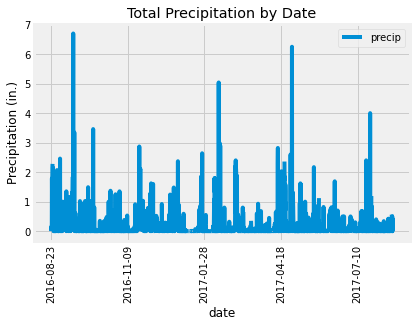

In [17]:
df.plot(rot = 90)
plt.ylabel('Precipitation (in.)')
plt.title('Total Precipitation by Date')

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
engine.execute('SELECT * from station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [20]:
#another way to do find all stations?
unique_stations = session.query(Station.station).all()
unique_stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_query = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Return station with most values
station_result =[s[0] for s in station_query[:1]]

station_id = station_result[0][:11]

station_id

'USC00519281'

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
min_temp = session.query(func.min(Measurement.tobs).filter(Measurement.station == station_id)).all()
max_temp = session.query(func.max(Measurement.tobs).filter(Measurement.station == station_id)).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == station_id).all()

print(f'The lowest temp for station USC00519281 is {min_temp}')
print(f'The highest temp for station USC00519281 is {max_temp}')
print(f'The average temp for station USC00519281 is {avg_temp}')

The lowest temp for station USC00519281 is [(54.0,)]
The highest temp for station USC00519281 is [(85.0,)]
The average temp for station USC00519281 is [(71.66378066378067,)]


In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Get temp data from the last year for all stations
temp_data = session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()
temp_data

[('USC00519397', '2016-08-23', 81.0),
 ('USC00513117', '2016-08-23', 76.0),
 ('USC00514830', '2016-08-23', 80.0),
 ('USC00517948', '2016-08-23', 80.0),
 ('USC00519523', '2016-08-23', 80.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00516128', '2016-08-23', 74.0),
 ('USC00519397', '2016-08-24', 79.0),
 ('USC00513117', '2016-08-24', 76.0),
 ('USC00514830', '2016-08-24', 80.0),
 ('USC00517948', '2016-08-24', 78.0),
 ('USC00519523', '2016-08-24', 79.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00516128', '2016-08-24', 74.0),
 ('USC00519397', '2016-08-25', 80.0),
 ('USC00513117', '2016-08-25', 77.0),
 ('USC00514830', '2016-08-25', 81.0),
 ('USC00517948', '2016-08-25', 81.0),
 ('USC00519523', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00516128', '2016-08-25', 77.0),
 ('USC00519397', '2016-08-26', 79.0),
 ('USC00513117', '2016-08-26', 78.0),
 ('USC00514830', '2016-08-26', 81.0),
 ('USC00517948', '2016-08-26', 81.0),
 ('USC00519523', '2016-08-26', 84.0),
 ('USC005192

In [29]:
# save temp_data to a dataframe and set index to date
df = pd.DataFrame(temp_data, columns = ['station','date','temp'])
df.set_index('date', inplace = True)

In [30]:
df

,station,temp
date,,
2016-08-23,USC00519397,81.0
2016-08-23,USC00513117,76.0
2016-08-23,USC00514830,80.0
2016-08-23,USC00517948,80.0
2016-08-23,USC00519523,80.0
...,...,...
2017-08-22,USC00516128,76.0
2017-08-23,USC00519397,81.0
2017-08-23,USC00514830,82.0


In [31]:
#find the unique station with the most entries for temperatures in the last year of data
unique_station = df['station'].value_counts()
unique_station

USC00519397    361
USC00519281    352
USC00516128    349
USC00513117    343
USC00519523    337
USC00514830    305
USC00517948    183
Name: station, dtype: int64

In [32]:
#check for null values
df['station'].isnull()

date
2016-08-23    False
2016-08-23    False
2016-08-23    False
2016-08-23    False
2016-08-23    False
              ...  
2017-08-22    False
2017-08-23    False
2017-08-23    False
2017-08-23    False
2017-08-23    False
Name: station, Length: 2230, dtype: bool

In [35]:
#filter dataframe to station with 
most_temp = df.loc[(df['station'] == "USC00519397")]
most_temp

,station,temp
date,,
2016-08-23,USC00519397,81.0
2016-08-24,USC00519397,79.0
2016-08-25,USC00519397,80.0
2016-08-26,USC00519397,79.0
2016-08-27,USC00519397,77.0
...,...,...
2017-08-19,USC00519397,79.0
2017-08-20,USC00519397,81.0
2017-08-21,USC00519397,81.0


Text(0, 0.5, 'Frequency')

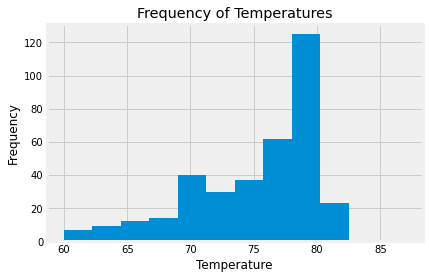

In [38]:
#histogram plot of the number of days each temperature occured in the last year, divided into 12 bins
most_temp.hist(bins = 12)
plt.title('Frequency of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

In [36]:
#filter dataframe to station with overall most rows - i thought the assignment was to find the most temperature data
#for the last year, and that is station USC00519397, but in order to get a graph that matches the example I had to use
#station USC00519281

most_rows = df.loc[(df['station'] == "USC00519281")]
most_rows

,station,temp
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


Text(0, 0.5, 'Frequency')

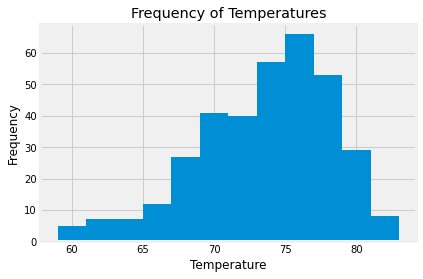

In [37]:
#histogram plot
most_rows.hist(bins = 12)
plt.title('Frequency of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')